In [170]:
import gctree
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import pickle
from matplotlib.ticker import MaxNLocator

## Load trees from results directory

In [171]:
results = "../nextflow/results"

In [172]:
metadata_PR1 = pd.read_csv("../metadata.PR1.csv")[["imm_duration", "strain", "mouse", "gc", "node", "cell_type"]]
metadata_PR1["pr"] = "1"
metadata_PR1["gc"] = metadata_PR1["gc"].astype(str)
metadata_PR1.rename({"imm_duration": "time"}, axis=1, inplace=True)
metadata_PR2 = pd.read_csv("../metadata.PR2.csv")[["mouse", "gc", "node", "cell_type"]]
metadata_PR2["pr"] = "2"
metadata_PR2["time"] = "d15"
metadata_PR2["strain"] = "wt"

metadata = pd.concat([metadata_PR1, metadata_PR2], ignore_index=True)
metadata.index = "PR" + metadata["pr"] + "_mouse" + metadata["mouse"].astype(str) + "_GC" + metadata["gc"]
metadata

,time,strain,mouse,gc,node,cell_type,pr
PR1_mouse1_GC1,d20,wt,1,1,RP,GC,1
PR1_mouse1_GC2,d20,wt,1,2,RP,GC,1
PR1_mouse1_GC3,d20,wt,1,3,RP,GC,1
PR1_mouse1_GC4,d20,wt,1,4,LP,GC,1
PR1_mouse1_GC5,d20,wt,1,5,LP,GC,1
...,...,...,...,...,...,...,...
PR2_mouse12_GC12B,d15,wt,12,12B,LP,GC,2
PR2_mouse12_GC12D,d15,wt,12,12D,LI,GC,2
PR2_mouse12_GC12C,d15,wt,12,12C,RI,GC,2
PR2_mouse10_GC10A,d15,wt,10,10A,RP,GC,2


In [173]:
def gc_key(file):
    PR_str = file.split("/")[-2].split("-")
    return int(PR_str[0].split(".")[0][2:]), int(PR_str[1]), PR_str[3]

files = sorted(glob.glob(f"{results}/gctrees/PR*/gctree.p"), key=gc_key)

trees = {}
for file in files:
    key = "_".join(f"{x}{y}" for x, y in zip(("PR", "mouse", "GC"), gc_key(file)))
    if (metadata.strain[key] == "wt") and (metadata.time[key] == "d20"):
    # if (metadata.strain[key] == "wt") and (metadata.time[key] in ("d15", "d20")):
        print(key)
        assert key not in trees, key
        trees[key] = pickle.load(open(file, "rb"))

print(f"loaded {len(trees)} GC trees")

PR1_mouse1_GC1
PR1_mouse1_GC11
PR1_mouse1_GC12
PR1_mouse1_GC13
PR1_mouse1_GC14
PR1_mouse1_GC15
PR1_mouse1_GC16
PR1_mouse1_GC17
PR1_mouse1_GC18
PR1_mouse1_GC19
PR1_mouse1_GC2
PR1_mouse1_GC20
PR1_mouse1_GC3
PR1_mouse1_GC4
PR1_mouse1_GC5
PR1_mouse1_GC6
PR1_mouse1_GC7
PR1_mouse2_GC21
PR1_mouse2_GC22
PR1_mouse2_GC23
PR1_mouse2_GC24
PR1_mouse2_GC25
PR1_mouse2_GC26
PR1_mouse2_GC28
PR1_mouse2_GC29
PR1_mouse2_GC30
PR1_mouse2_GC31
PR1_mouse2_GC32
PR1_mouse2_GC34
PR1_mouse2_GC38
PR1_mouse2_GC39
PR1_mouse2_GC40
PR1_mouse3_GC41
PR1_mouse3_GC42
PR1_mouse3_GC43
PR1_mouse3_GC44
PR1_mouse3_GC45
PR1_mouse3_GC46
PR1_mouse3_GC55
PR1_mouse3_GC56
PR1_mouse3_GC57
PR1_mouse3_GC58
PR1_mouse3_GC59
PR1_mouse3_GC64
PR1_mouse3_GC65
PR1_mouse3_GC66
PR1_mouse3_GC72
PR1_mouse4_GC47
PR1_mouse4_GC48
PR1_mouse4_GC50
PR1_mouse4_GC63
PR1_mouse4_GC67
PR1_mouse4_GC68
PR1_mouse4_GC69
PR1_mouse4_GC70
PR1_mouse4_GC71
PR1_mouse4_GC73
PR1_mouse5_GC78
PR1_mouse5_GC79
PR1_mouse5_GC80
PR1_mouse5_GC81
PR1_mouse5_GC82
PR1_mouse5_GC83

In [174]:
# mmodel = gctree.mutation_model.MutationModel(mutability_file="../nextflow/data/mutability/MK_RS5NF_mutability.csv", substitution_file="../nextflow/data/mutability/MK_RS5NF_substitution.csv")
# mutability_edge_weight_func = gctree.mutation_model._mutability_distance(mmodel)

## Affinity node feauture

In [175]:
# dms_df = pd.read_csv("output/tite-seq-modeling/variant_params.csv")
dms_df = pd.read_csv("https://media.githubusercontent.com/media/jbloomlab/Ab-CGGnaive_DMS/improved-Kd-fitting/tite-seq-modeling/output/final_variant_scores.csv", index_col="mutation", dtype=dict(position_IMGT=pd.Int16Dtype()))
dms_df

,target,wildtype,position,position_IMGT,chain,annotation,mutant,codon,single_nt,bind_CGG_old,...,expr,delta_expr,n_bc_expr,n_libs_expr,psr,delta_psr,n_bc_psr,n_libs_psr,bind_CGG,delta_bind_CGG
mutation,,,,,,,,,,,,,,,,,,,,,
E1(H)A,CGG_naive,E,1,1,H,FWRH1,A,GAG,True,10.48829,...,10.44614,-0.00453,19.0,2.0,6.78608,-0.07452,17.0,2.0,8.743409,0.118716
E1(H)C,CGG_naive,E,1,1,H,FWRH1,C,GAG,False,10.44477,...,10.32364,-0.12703,20.0,2.0,7.44234,0.58174,17.0,2.0,8.608721,-0.015972
E1(H)D,CGG_naive,E,1,1,H,FWRH1,D,GAG,True,10.42771,...,10.51618,0.06551,16.0,2.0,6.95940,0.09880,13.0,2.0,8.636242,0.011550
E1(H)E,CGG_naive,E,1,1,H,FWRH1,E,GAG,True,10.45719,...,10.45067,0.00000,21170.0,2.0,6.86060,0.00000,18910.0,2.0,NaN,NaN
E1(H)F,CGG_naive,E,1,1,H,FWRH1,F,GAG,False,10.51899,...,10.33163,-0.11904,24.0,2.0,6.91372,0.05313,21.0,2.0,8.758316,0.133624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NANA(link)S,CGG_naive,NaN,121,<NA>,link,NaN,S,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NANA(link)T,CGG_naive,NaN,121,<NA>,link,NaN,T,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NANA(link)V,CGG_naive,NaN,121,<NA>,link,NaN,V,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [176]:
delta_bind_attr = "delta_bind"

## Data frame with a row for each node on each tree, excluding 10-week mice, and LMP mice

REI decay factor

In [177]:
tau = 0.5

In [178]:
rows = []
for gc, tree in trees.items():    
    # hack: tree with all dist = 1, to get edge count distances between nodes
    tree_topo = tree.tree.copy(method="deepcopy")
    for node in tree_topo.traverse():
        if not node.is_root():
            node.dist = 1
        
    total_abundance = sum(node.abundance for node in tree.tree.traverse())

    for node, node_topo in zip(tree.tree.traverse(), tree_topo.traverse()):
            assert node.name == node_topo.name
        
            root_distance_nt = node.get_distance(tree.tree)
            root_distance_topo = node_topo.get_distance(tree_topo)

            descendant_distances_nt = [node.get_distance(descendant)
                                       for descendant in node.traverse()
                                       if descendant.abundance]
            descendant_distances_topo = [node_topo.get_distance(descendant)
                                         for descendant in node_topo.traverse()
                                         if descendant.abundance]
            
            assert all(x >= y for x, y in zip(descendant_distances_nt, descendant_distances_topo))
            
            closest_leaf_distance_nt = min(descendant_distances_nt)
            closest_leaf_distance_topo = min(descendant_distances_topo)
            farthest_leaf_distance_nt = max(descendant_distances_nt)
            farthest_leaf_distance_topo = max(descendant_distances_topo)
            
            node.REI = sum(node2.abundance * tau ** node2.get_distance(node) for node2 in node.traverse()) / total_abundance

            if farthest_leaf_distance_topo == 0:
                assert farthest_leaf_distance_nt == 0, (gc, node.name, len(node.children), farthest_leaf_distance_nt)
            
            # if node.up is not None:                
            #     mutability_change = (sum(mutability[0]
            #                              for mutability in mmodel.mutabilities(node.sequence))
            #                          - sum(mutability[0]
            #                                for mutability in mmodel.mutabilities(node.up.sequence)))
            # else:
            #     mutability_change = np.nan
            
            branch_length = sum(node.dist for node in tree.tree.traverse())

            # compare nodes (e.g. bursts) with their sisters
            if node.up is not None and len(node.up.children) > 1:
                mean_sister_delta_bind_CGG_naive = np.mean([getattr(node2, delta_bind_attr)
                                                for node2 in node.up.children
                                                if node2.name != node.name])
            else:
                mean_sister_delta_bind_CGG_naive = np.nan
            
            rows.append([gc,
                         node.name,
                         node.up.name if node.up else np.nan,
                         ";".join(node.mutations),
                         ";".join(set(node.mutations) - (set(node.up.mutations) if node.up is not None else set())),
                         ";".join((set(node.up.mutations) if node.up is not None else set()) - set(node.mutations)),
                         node.abundance,
                         len(node.children),
                         node.abundance + len(node.children),
                         node.LBI,
                         node.LBR,
                         node.REI,
                         sum(node.LB_down.values()) / branch_length,
                         root_distance_nt,
                         root_distance_topo,
                         closest_leaf_distance_nt,
                         closest_leaf_distance_topo,
                         farthest_leaf_distance_nt,
                         farthest_leaf_distance_topo,
                         getattr(node, delta_bind_attr),
                         getattr(node.up, delta_bind_attr) if node.up else np.nan,
                         getattr(node, delta_bind_attr) - getattr(node.up, delta_bind_attr) if node.up is not None else np.nan,
                         node.delta_expr,
                         node.delta_psr,
                         mean_sister_delta_bind_CGG_naive,
                         # mutability_change
                        ])

df = pd.DataFrame(rows, columns=["GC",
                                 "name",
                                 "parent_name",
                                 "aa_mutations",
                                 "aa_mutations_edge_gained",
                                 "aa_mutations_edge_lost",
                                 "abundance",
                                 "n_mutant_edges",
                                 "polytomy_degree",
                                 "LBI",
                                 "LBR",
                                 "REI",
                                 "LBF",
                                 "root_distance_nt",
                                 "root_distance_topo",
                                 "closest_leaf_distance_nt",
                                 "closest_leaf_distance_topo",
                                 "farthest_leaf_distance_nt",
                                 "farthest_leaf_distance_topo",
                                 "delta_bind_CGG_naive",
                                 "parent_delta_bind_CGG_naive",
                                 "delta_bind_CGG_edge",
                                 "delta_expr",
                                 "delta_psr",
                                 "mean_sister_delta_bind_CGG_naive",
                                 # "mutability_change",
                                ])

df

,GC,name,parent_name,aa_mutations,aa_mutations_edge_gained,aa_mutations_edge_lost,abundance,n_mutant_edges,polytomy_degree,LBI,...,closest_leaf_distance_nt,closest_leaf_distance_topo,farthest_leaf_distance_nt,farthest_leaf_distance_topo,delta_bind_CGG_naive,parent_delta_bind_CGG_naive,delta_bind_CGG_edge,delta_expr,delta_psr,mean_sister_delta_bind_CGG_naive
0,PR1_mouse1_GC1,naive,NaN,,,,0,5,5,11.383587,...,1.0,1.0,12.0,6.0,0.000000,NaN,NaN,0.00000,0.00000,NaN
1,PR1_mouse1_GC1,seq62,naive,Y103(H)F;S20(L)N;L116(L)P,Y103(H)F;S20(L)N;L116(L)P,,1,0,1,1.172202,...,0.0,0.0,0.0,0.0,0.082255,0.000000,0.082255,0.14827,-0.13364,-1.643222
2,PR1_mouse1_GC1,seq9,naive,E51(H)G;Y52(H)F;Y66(L)N;V71(L)I;D74(L)A;Q95(L)...,Q95(L)E;D74(L)A;V71(L)I;N108(L)K;S96(L)P;Y52(H...,,1,0,1,1.000157,...,0.0,0.0,0.0,0.0,-1.414257,0.000000,-1.414257,-1.05627,3.34321,-1.269095
3,PR1_mouse1_GC1,seq76,naive,Y58(H)D,Y58(H)D,,1,1,2,5.881581,...,0.0,0.0,2.0,1.0,-0.663515,0.000000,-0.663515,-0.15104,-0.15010,-1.456780
4,PR1_mouse1_GC1,17,naive,N40(H)H;N108(L)D;Y114(L)S;E125(L)Q,N108(L)D;Y114(L)S;N40(H)H;E125(L)Q,,0,2,2,3.115025,...,3.0,1.0,5.0,1.0,-4.941192,0.000000,-4.941192,-0.77924,2.61806,-0.387361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5586,PR1_mouse6_GC77,seq45,1,K49(H)I;G54(H)V;S70(H)A;K72(H)R;S74(H)G;I78(H)...,Y88(H)S,,1,0,1,1.363245,...,0.0,0.0,0.0,0.0,0.267711,0.229581,0.038130,-1.97716,4.12977,0.343619
5587,PR1_mouse6_GC77,seq19,10,S57(H)N;S64(H)R;T65(H)I;Y103(H)F;A105(H)G,Y103(H)F,,1,0,1,1.072084,...,0.0,0.0,0.0,0.0,1.619965,1.486021,0.133944,-0.08653,0.23259,1.000586
5588,PR1_mouse6_GC77,seq17,10,S57(H)N;S64(H)R;T65(H)I;A105(H)G;M11(L)L;G36(L...,K123(L)N;M11(L)L;Y66(L)S;G36(L)V,,2,0,2,2.273950,...,0.0,0.0,0.0,0.0,0.583558,1.486021,-0.902463,-0.31626,-0.55349,1.518790
5589,PR1_mouse6_GC77,seq9,10,S57(H)N;S64(H)R;T65(H)I;L89(H)V;A105(H)G,L89(H)V,,3,1,4,4.030638,...,0.0,0.0,1.0,1.0,1.417615,1.486021,-0.068407,-0.12466,-0.23740,1.101761


In [179]:
# NOTE: remove affinity effect of A105(H))G mutation!!!!!
# df.loc[df.aa_mutations.str.contains("A105(H)G", regex=False), "delta_bind_CGG_naive"] -= 0.331
# df.loc[df.aa_mutations_edge_gained.str.contains("A105(H)G", regex=False), "delta_bind_CGG_edge"] -= 0.331

In [180]:
# check that names are unique
df.groupby(["GC", "name"]).size().unique()

array([1])

In [181]:
output_dir = "output/fitness-regression"

In [182]:
df.to_csv(f"{output_dir}/data.csv", index=False)

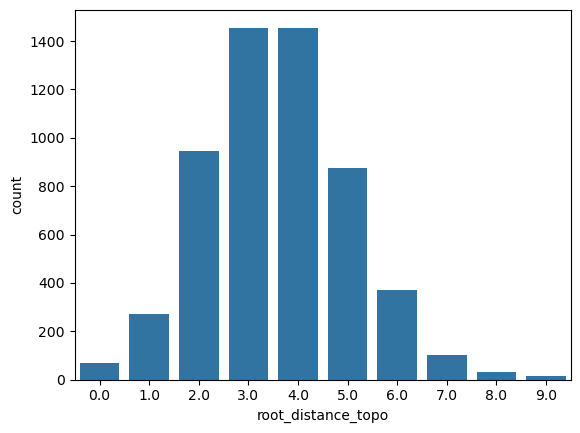

In [183]:
sns.countplot(data=df, x="root_distance_topo")
plt.show()

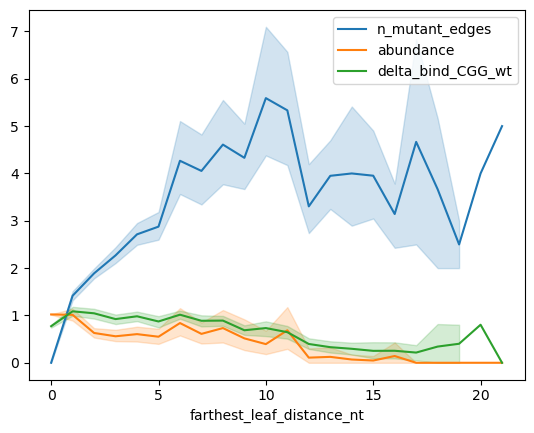

In [184]:
sns.lineplot(data=df, x="farthest_leaf_distance_nt", y="n_mutant_edges", label="n_mutant_edges")
sns.lineplot(data=df, x="farthest_leaf_distance_nt", y="abundance", label="abundance")
sns.lineplot(data=df, x="farthest_leaf_distance_nt", y="delta_bind_CGG_naive", label="delta_bind_CGG_wt")
# sns.lineplot(data=df, x="farthest_leaf_distance_nt", y="polytomy_degree", label="polytomy_degree")
plt.ylabel("")
plt.show()

<Axes: xlabel='farthest_leaf_distance_nt', ylabel='REI'>

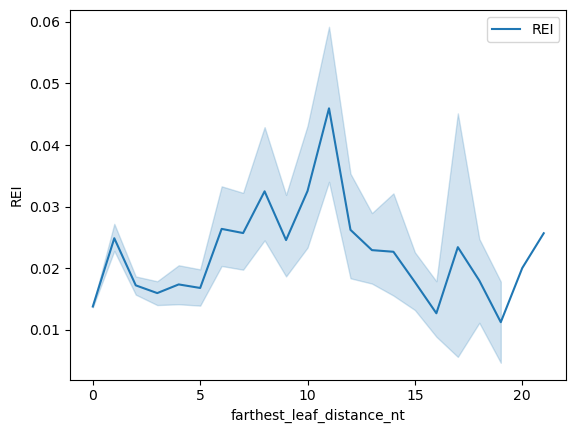

In [185]:
sns.lineplot(data=df, x="farthest_leaf_distance_nt", y="REI", label="REI")

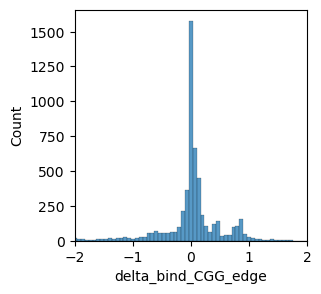

In [186]:
plt.figure(figsize=(3, 3))
sns.histplot(data=df, x="delta_bind_CGG_edge", bins=120)
plt.xlim(-2, 2)
plt.show()

/Users/wsdewitt/miniconda3/envs/replay/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/wsdewitt/miniconda3/envs/replay/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/wsdewitt/miniconda3/envs/replay/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key

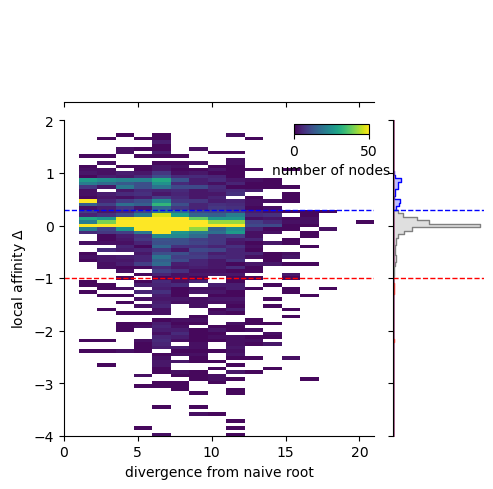

In [187]:
gain_thresh = 0.3
loss_thresh = -1

# absolute affinity strata
df.loc[~df.delta_bind_CGG_naive.isna(), "affinity stratum"] = "affinity neutral"
df.loc[df["delta_bind_CGG_naive"] > gain_thresh, "affinity stratum"] = "affinity gain"
df.loc[df["delta_bind_CGG_naive"] < loss_thresh, "affinity stratum"] = "affinity loss"

# affinity change strata
df.loc[~df.delta_bind_CGG_edge.isna(), "affinity change stratum"] = "affinity neutral"
df.loc[df["delta_bind_CGG_edge"] > gain_thresh, "affinity change stratum"] = "affinity gain"
df.loc[df["delta_bind_CGG_edge"] < loss_thresh, "affinity change stratum"] = "affinity loss"
palette = {"affinity loss": "red", "affinity neutral": "grey", "affinity gain": "blue"}


g = sns.JointGrid(data=df,
                  x="root_distance_nt",
                  # x="farthest_leaf_distance_nt",
                #   y="delta_bind_CGG_naive",
                  y="delta_bind_CGG_edge",
                  xlim=(0, df.root_distance_nt.max()),
                  ylim=(-4, 2),
                  height=5, ratio=3)
g = g.plot_joint(sns.histplot,
                 bins=(16, 120),
                 vmax=50,
                 cmap="viridis",
                 cbar=True,                 
                 cbar_ax=plt.gcf().add_axes([0.59, 0.72, 0.15, 0.02]),
                 cbar_kws=dict(orientation='horizontal', label="number of nodes"),
                )
sns.histplot(ax=g.ax_marg_y,
            #  y=df["delta_bind_CGG_naive"],
            #  hue=df["affinity stratum"],
             y=df.loc[~df.delta_bind_CGG_edge.isna(), "delta_bind_CGG_edge"],
             hue=df.loc[~df.delta_bind_CGG_edge.isna(), "affinity change stratum"],
             bins=120,
             palette=palette,
             fill=True, element="step", linewidth=1,
             legend=False)
g.ax_marg_y.axhline(gain_thresh, c="blue", ls="--", lw=1)
g.ax_marg_y.axhline(loss_thresh, c="red", ls="--", lw=1)
g.ax_joint.axhline(gain_thresh, c="blue", ls="--", lw=1)
g.ax_joint.axhline(loss_thresh, c="red", ls="--", lw=1)
g.set_axis_labels(
    "divergence from naive root",
    # "distance from farthest leaf",
    # r"affinity $\Delta$",
    r"local affinity $\Delta$",
    )
plt.savefig(f"{output_dir}/heatmap.pdf")
plt.show()


# g = sns.JointGrid(data=df, x="root_distance_nt", y="LBR",
#                   xlim=(0, df.root_distance_nt.max()),
#                   height=5, ratio=3)
# g = g.plot_joint(sns.histplot,
#                  bins=(16, 15),
#                  vmax=50,
#                  cmap="viridis",
#                  log_scale=(False, False))
# sns.histplot(ax=g.ax_marg_y,
#              y=df.LBR, hue=df["affinity change stratum"],
#              log_scale=False,
#              bins=15,
#              stat="probability", common_norm=False,
#              palette=palette,
#              fill=False, element="step", linewidth=1,
#              legend=False)
# g.set_axis_labels("divergence from naive root", "LBR")
# plt.show()

/Users/wsdewitt/miniconda3/envs/replay/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/wsdewitt/miniconda3/envs/replay/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/wsdewitt/miniconda3/envs/replay/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key

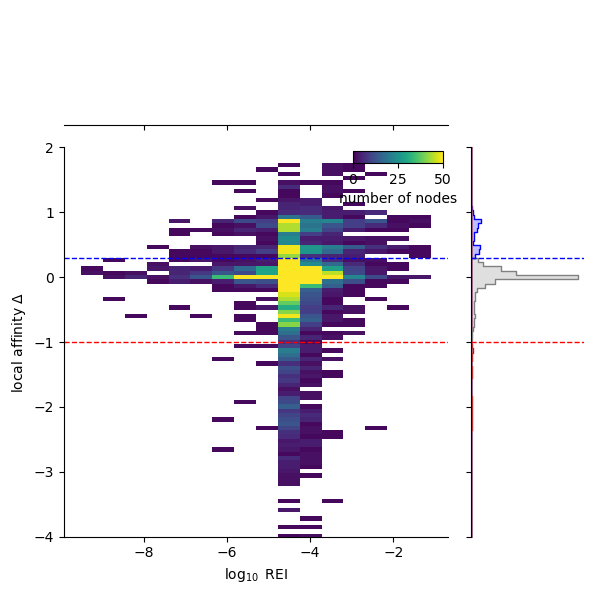

In [188]:
gain_thresh = 0.3
loss_thresh = -1
df.loc[~df.delta_bind_CGG_edge.isna(), "affinity change stratum"] = "affinity neutral"
df.loc[df["delta_bind_CGG_edge"] > gain_thresh, "affinity change stratum"] = "affinity gain"
df.loc[df["delta_bind_CGG_edge"] < loss_thresh, "affinity change stratum"] = "affinity loss"
palette = {"affinity loss": "red", "affinity neutral": "grey", "affinity gain": "blue"}


g = sns.JointGrid(data=df, x=np.log(df.REI),
                  y="delta_bind_CGG_edge",
                #   xlim=(0, np.log(df.REI.max())),
                  ylim=(-4, 2),
                  height=6, ratio=3)
g = g.plot_joint(sns.histplot,
                 bins=(16, 120),
                 vmax=50,
                 cmap="viridis",
                 cbar=True,                 
                 cbar_ax=plt.gcf().add_axes([0.59, 0.72, 0.15, 0.02]),
                 cbar_kws=dict(orientation='horizontal', label="number of nodes"),
                )
sns.histplot(ax=g.ax_marg_y,
             y=df.loc[~df.delta_bind_CGG_edge.isna(), "delta_bind_CGG_edge"], hue=df.loc[~df.delta_bind_CGG_edge.isna(), "affinity change stratum"],
             bins=120,
             palette=palette,
             fill=True, element="step", linewidth=1,
             legend=False)
g.ax_marg_y.axhline(gain_thresh, c="blue", ls="--", lw=1)
g.ax_marg_y.axhline(loss_thresh, c="red", ls="--", lw=1)
g.ax_joint.axhline(gain_thresh, c="blue", ls="--", lw=1)
g.ax_joint.axhline(loss_thresh, c="red", ls="--", lw=1)
g.set_axis_labels(r"$\log_{10}$ REI", r"local affinity $\Delta$")
plt.savefig(f"{output_dir}/heatmap2.pdf")
plt.show()

/Users/wsdewitt/miniconda3/envs/replay/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/wsdewitt/miniconda3/envs/replay/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/wsdewitt/miniconda3/envs/replay/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key

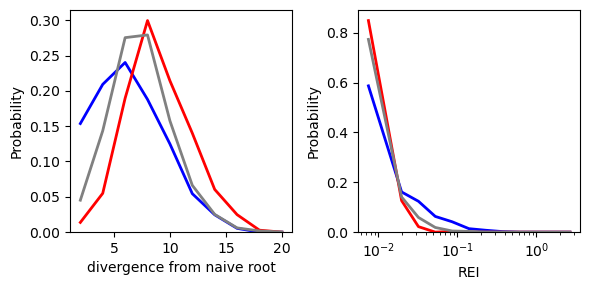

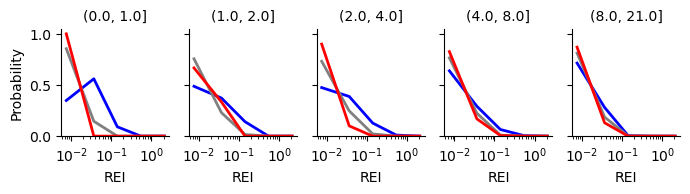

In [189]:
df["divergence stratum"] = pd.cut(df.root_distance_nt, [0, 1, 2, 4, 8, df.root_distance_nt.max()])
df["leaf distance stratum"] = pd.cut(df.farthest_leaf_distance_nt, [0, 2, 5, 10, df.farthest_leaf_distance_nt.max()])

# branching_stat = "LBI"
# branching_stat = "LBR"
branching_stat = "REI"

linthresh = 0.015
bins1 = [0] + list(np.logspace(np.log10(linthresh), np.log10(df[branching_stat].max()) + 1, 12))
bins2 = [0] + list(np.logspace(np.log10(linthresh), np.log10(df[branching_stat].max()) + 1, 5))

plt.figure(figsize=(6, 3))

plt.subplot(121)
sns.histplot(data=df.loc[~df.delta_bind_CGG_edge.isna()],
             x="root_distance_nt",
            #  x="farthest_leaf_distance_nt",
            #  hue="affinity stratum",
             hue="affinity change stratum",
             bins=10,
             stat="probability", common_norm=False,
             palette=palette,
             fill=False, element="poly", linewidth=2,
             legend=False)
plt.xlabel("divergence from naive root")
# plt.xlabel("distance from farthest leaf")
# plt.xscale("log")
# plt.yscale("log")

plt.subplot(122)
sns.histplot(data=df.loc[~df.delta_bind_CGG_edge.isna()], x=branching_stat,
            #  hue="affinity stratum",
             hue="affinity change stratum",
             bins=bins1,
             stat="probability", common_norm=False,
             palette=palette,
             fill=False, element="poly", linewidth=2,
             legend=False)
plt.xlabel(branching_stat)
plt.xscale("log")
# plt.yscale("log")
# plt.xscale("symlog", linthresh=linthresh)
# plt.xlim(0, None)
plt.tight_layout()
plt.savefig(f"{output_dir}/divergence-{branching_stat}.pdf")
plt.show()

g = sns.displot(data=df.loc[~df.delta_bind_CGG_edge.isna()],
            col="divergence stratum",
            # col="leaf distance stratum",
            x=branching_stat,
            # hue="affinity stratum",
            hue="affinity change stratum",
            hue_order=palette.keys(),
            palette=palette,
            bins=bins2,
            stat="probability",
            common_norm=False,
            aspect=0.7, height=2,
            fill=False, element="poly", linewidth=2,
            legend=False
           )
g.set_titles(col_template="{col_name}")
plt.xscale("log")
# plt.yscale("log")
# plt.xscale("symlog", linthresh=linthresh)
# plt.xlim(0, None)
plt.savefig(f"{output_dir}/divergence-stratified-{branching_stat}.pdf")
plt.show()

In [190]:
df.query("`affinity stratum` == 'affinity gain' & 0.095 < REI < 0.105")

,GC,name,parent_name,aa_mutations,aa_mutations_edge_gained,aa_mutations_edge_lost,abundance,n_mutant_edges,polytomy_degree,LBI,...,delta_bind_CGG_naive,parent_delta_bind_CGG_naive,delta_bind_CGG_edge,delta_expr,delta_psr,mean_sister_delta_bind_CGG_naive,affinity stratum,affinity change stratum,divergence stratum,leaf distance stratum
1971,PR1_mouse2_GC26,16,17,A105(H)G;N108(L)K,N108(L)K,,0,2,2,13.508528,...,1.305304,0.446073,0.859231,0.04020,0.15191,0.974697,affinity gain,affinity gain,"(1.0, 2.0]","(5.0, 10.0]"
3621,PR1_mouse3_GC59,seq31,3,S57(H)N;S64(H)R;A105(H)G,S57(H)N;S64(H)R,,3,8,11,9.808548,...,1.450213,0.446073,1.004140,-0.04328,-0.01930,0.552549,affinity gain,affinity gain,"(2.0, 4.0]","(2.0, 5.0]"
3880,PR1_mouse3_GC72,seq1,5,T65(H)S;T95(H)S;A105(H)G;G36(L)D;N108(L)K,T95(H)S;A105(H)G,,5,3,8,6.789899,...,0.832226,0.368694,0.463533,-0.14340,0.06986,0.581046,affinity gain,affinity gain,"(4.0, 8.0]","(0.0, 2.0]"
3901,PR1_mouse3_GC72,seq4,4,T65(H)S;G36(L)D;A52(L)S;N108(L)K,,,4,9,13,12.413929,...,1.046003,1.046003,0.000000,-0.17490,0.28702,-0.185497,affinity gain,affinity neutral,"(4.0, 8.0]","(5.0, 10.0]"
4005,PR1_mouse4_GC48,seq9,naive,T65(H)I;Y103(H)F;K51(L)R;A52(L)S,Y103(H)F;A52(L)S;K51(L)R;T65(H)I,,3,14,17,16.469630,...,0.872607,0.000000,0.872607,-0.13738,0.22880,-0.048261,affinity gain,affinity gain,"(4.0, 8.0]","(5.0, 10.0]"
4006,PR1_mouse4_GC48,seq42,naive,Y42(L)N;N108(L)H,N108(L)H;Y42(L)N,,2,15,17,18.535323,...,0.979110,0.000000,0.979110,-1.10723,0.62893,-0.066011,affinity gain,affinity gain,"(1.0, 2.0]","(2.0, 5.0]"
4454,PR1_mouse4_GC70,7,8,N92(H)K;Y42(L)C;N108(L)H,Y42(L)C,,0,2,2,11.438962,...,0.983544,0.853059,0.130484,-0.38964,0.08942,-1.089587,affinity gain,affinity neutral,"(2.0, 4.0]","(5.0, 10.0]"


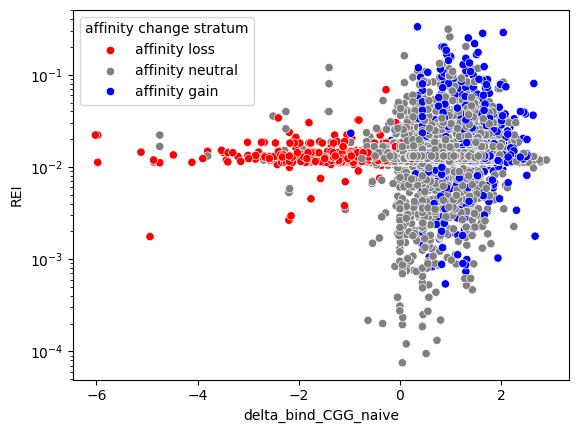

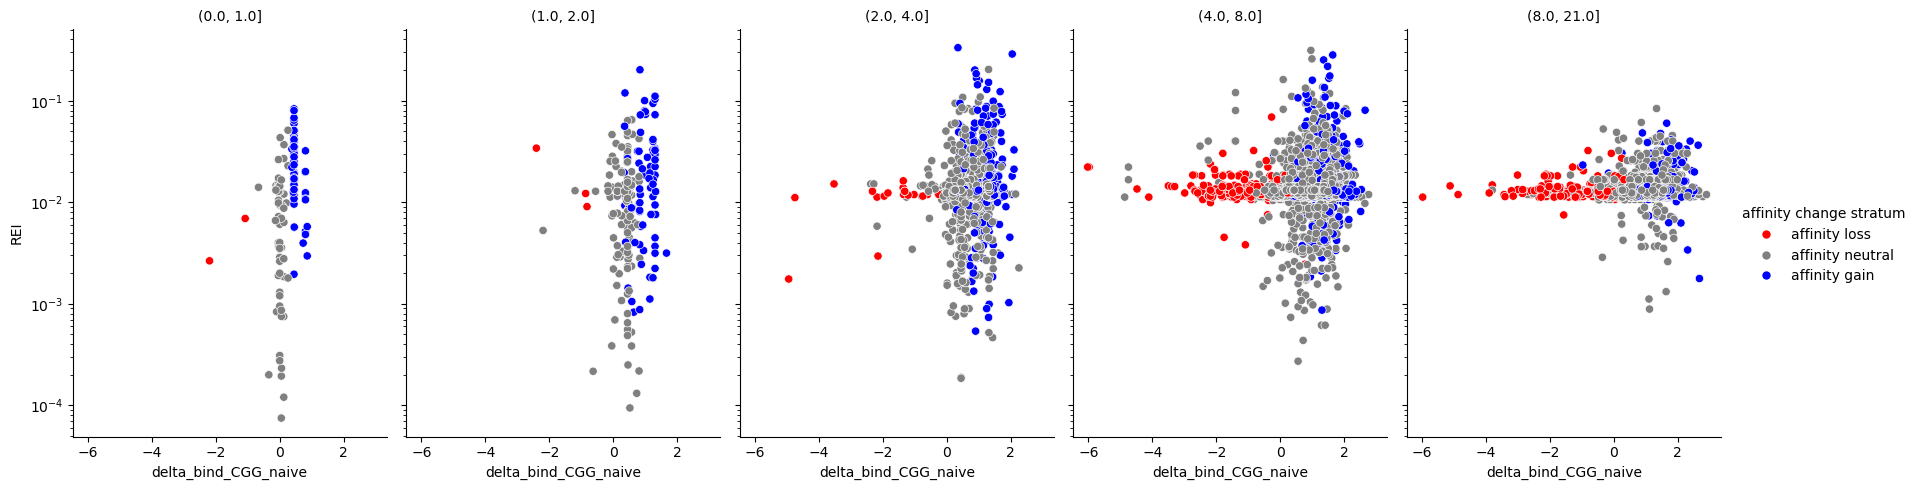

In [191]:
g = sns.scatterplot(data=df, x="delta_bind_CGG_naive", y="REI", hue="affinity change stratum",
                palette=palette, hue_order=palette.keys())
plt.yscale("log")
# g.set_xlabels("affinity")
plt.show()

g = sns.relplot(data=df, x="delta_bind_CGG_naive", y="REI", col="divergence stratum", hue="affinity change stratum",
                palette=palette, hue_order=palette.keys(),
           aspect=0.7, height=5,)
g.set_titles(col_template="{col_name}")
# g.axes[0,0].axvline(thresh)
plt.yscale("log")
# g.set_xlabels("affinity")
plt.show()

LBI: p=0.61
LBR: p=0.84
REI: p=0.11


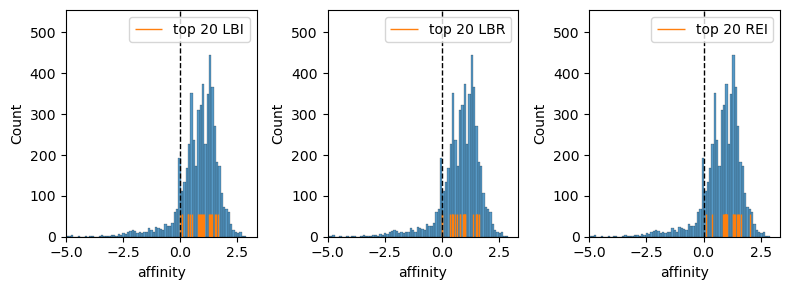

In [192]:
from scipy.stats import ttest_ind

top = 20

plt.figure(figsize=(8, 3))
plt.subplot(131)
sns.histplot(data=df, x="delta_bind_CGG_naive")
sns.rugplot(data=df.loc[df.sort_values("LBI", ascending=False).head(top).index], x="delta_bind_CGG_naive", color="C1", height=0.1, label=f"top {top} LBI", lw=2)
plt.axvline(0, c="k", ls="--", lw=1)
plt.xlabel("affinity")
plt.xlim(-5, None)
plt.legend()

print(f'LBI: p={ttest_ind(df.delta_bind_CGG_naive[df.sort_values("LBI", ascending=False).head(top).index], df.delta_bind_CGG_naive[~df.index.isin(df.sort_values("LBI", ascending=False).head(top).index)], nan_policy="omit").pvalue:.2f}')

plt.subplot(132)
sns.histplot(data=df, x="delta_bind_CGG_naive")
sns.rugplot(data=df.loc[df.sort_values("LBR", ascending=False).head(top).index], x="delta_bind_CGG_naive", color="C1", height=0.1, label=f"top {top} LBR", lw=2)
plt.axvline(0, c="k", ls="--", lw=1)
plt.xlabel("affinity")
plt.xlim(-5, None)
plt.legend()

print(f'LBR: p={ttest_ind(df.delta_bind_CGG_naive[df.sort_values("LBR", ascending=False).head(top).index], df.delta_bind_CGG_naive[~df.index.isin(df.sort_values("LBR", ascending=False).head(top).index)], nan_policy="omit").pvalue:.2f}')

plt.subplot(133)
sns.histplot(data=df, x="delta_bind_CGG_naive")
sns.rugplot(data=df.loc[df.sort_values("REI", ascending=False).head(top).index], x="delta_bind_CGG_naive", color="C1", height=0.1, label=f"top {top} REI", lw=2)
plt.axvline(0, c="k", ls="--", lw=1)
plt.xlabel("affinity")
plt.xlim(-5, None)
plt.legend()

print(f'REI: p={ttest_ind(df.delta_bind_CGG_naive[df.sort_values("REI", ascending=False).head(top).index], df.delta_bind_CGG_naive[~df.index.isin(df.sort_values("REI", ascending=False).head(top).index)], nan_policy="omit").pvalue:.2f}')

plt.tight_layout()

plt.savefig(f"{output_dir}/top10.pdf")
plt.show()


# g = sns.displot(data=df, x="delta_bind_CGG_naive", col="divergence stratum", hue="burst",
#                 alpha=1, hue_order=[True, False],
#            aspect=0.7, height=3,)
# g.set_titles(col_template="{col_name}")
# g.axes[0,0].axvline(0, c="k", ls="--", lw=1)
# g.axes[0,1].axvline(0, c="k", ls="--", lw=1)
# g.axes[0,2].axvline(0, c="k", ls="--", lw=1)
# g.axes[0,3].axvline(0, c="k", ls="--", lw=1)
# g.axes[0,4].axvline(0, c="k", ls="--", lw=1)
# g.set_xlabels("affinity")
# plt.xlim(-2, 2)
# plt.show()

### Comparison to sisters

For statistical independence, we can only take one node—the max REI node—from each tree

In [193]:
# max REI row per GC
df_max = df.loc[df.groupby("GC")["REI"].idxmax()]

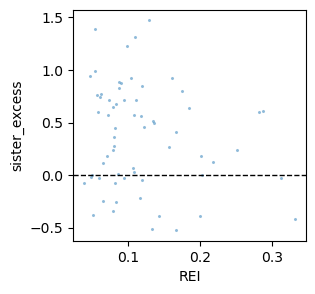

In [194]:
df_max["sister_excess"] = df_max.delta_bind_CGG_naive - df_max.mean_sister_delta_bind_CGG_naive

# plot of sister excess vs. REI
plt.figure(figsize=(3, 3))
sns.scatterplot(data=df_max,
                y="sister_excess", x="REI", s=5, alpha=0.5)
plt.axhline(0, c="k", ls="--", lw=1)
# plt.axhline(0.2, c="k", ls="--", lw=1)
# plt.axvline(0, c="k", ls="--", lw=1)
# plt.xlim(-2, 2)
# plt.ylim(-0.05, 0.25)
plt.show()

In [195]:
df_max.sort_values("delta_bind_CGG_naive")[["GC", "REI", "name", "delta_bind_CGG_naive"]]

,GC,REI,name,delta_bind_CGG_naive
2601,PR1_mouse2_GC39,0.120000,seq10,-1.401235
3532,PR1_mouse3_GC58,0.050164,seq29,-0.028390
5511,PR1_mouse6_GC77,0.068267,naive,0.000000
3161,PR1_mouse3_GC46,0.048780,seq15,0.083486
3436,PR1_mouse3_GC57,0.161347,seq1,0.088613
...,...,...,...,...
3745,PR1_mouse3_GC65,0.122633,seq3,1.666779
2268,PR1_mouse2_GC31,0.073438,seq10,1.730604
1357,PR1_mouse1_GC6,0.070783,seq14,1.978371
1518,PR1_mouse2_GC21,0.078827,seq24,1.990913


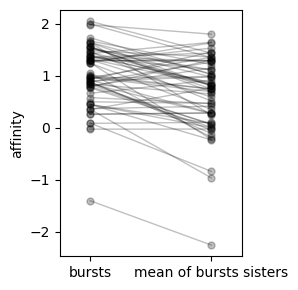

In [196]:
plt.figure(figsize=(3, 3))
plt.plot([[0, 1]] * len(df_max), df_max[["delta_bind_CGG_naive", "mean_sister_delta_bind_CGG_naive"]].values, "o", c="k", ms=5, alpha=0.25)
for i, (x, y) in enumerate(df_max[["delta_bind_CGG_naive", "mean_sister_delta_bind_CGG_naive"]].values):
    plt.plot([0, 1], [x, y], c="k", lw=1, alpha=0.25)
plt.xticks([0, 1], ["bursts", "mean of bursts sisters"])
plt.ylabel("affinity")
plt.xlim(-0.25, 1.25)
plt.tight_layout()
plt.savefig(f"{output_dir}/sister-affinity.pdf")
plt.show()

In [197]:
# two sample test
from scipy.stats import ttest_rel
df_max_nonan = df_max[["delta_bind_CGG_naive", "mean_sister_delta_bind_CGG_naive"]].dropna()
ttest_rel(df_max_nonan.delta_bind_CGG_naive,
          df_max_nonan.mean_sister_delta_bind_CGG_naive,
          alternative="greater",
          )

TtestResult(statistic=6.021246944355862, pvalue=4.883551518019082e-08, df=63)

In [198]:
# df_max.loc[df_max.delta_bind_CGG_naive == df_max.delta_bind_CGG_naive.min()]

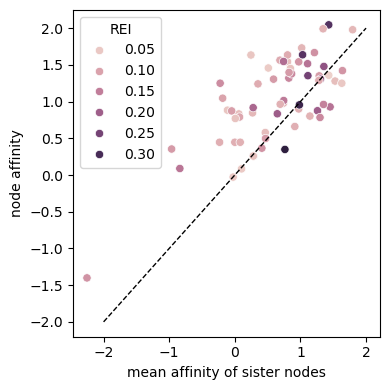

In [199]:
plt.figure(figsize=(4, 4))
sns.scatterplot(data=df_max, y="delta_bind_CGG_naive", x="mean_sister_delta_bind_CGG_naive", hue="REI")
plt.plot([-2, 2], [-2, 2], c="k", ls="--", lw=1)
# plt.xlim(-0.5, 2)
# plt.ylim(-0.5, 2)
plt.xlabel("mean affinity of sister nodes")
plt.ylabel("node affinity")
plt.tight_layout()
plt.savefig(f"{output_dir}/sister-affinity2.pdf")
plt.show()

## Are terrible nodes usually leaves? 

Note: need to aggregate to a GC-level metric, so we can properly test

/Users/wsdewitt/miniconda3/envs/replay/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/wsdewitt/miniconda3/envs/replay/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/wsdewitt/miniconda3/envs/replay/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key

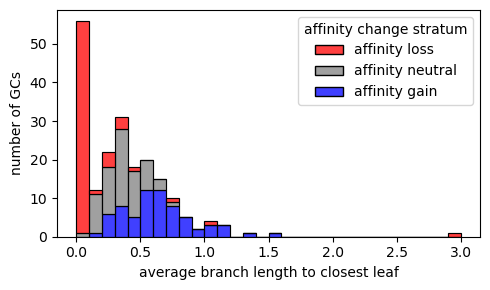

In [200]:
df_groups = df.groupby(["GC", "affinity change stratum"]).closest_leaf_distance_nt.mean().reset_index()

plt.figure(figsize=(5, 3))
sns.histplot(data=df_groups,
              hue="affinity change stratum", x="closest_leaf_distance_nt",
              hue_order=("affinity loss", "affinity neutral", "affinity gain"),
              multiple="stack",
              bins=30,
              palette=palette,
            #   size=5
              )
plt.xlabel("average branch length to closest leaf")
plt.ylabel("number of GCs")
plt.tight_layout()
plt.savefig(f"{output_dir}/terrible-histogram.pdf")
plt.show()

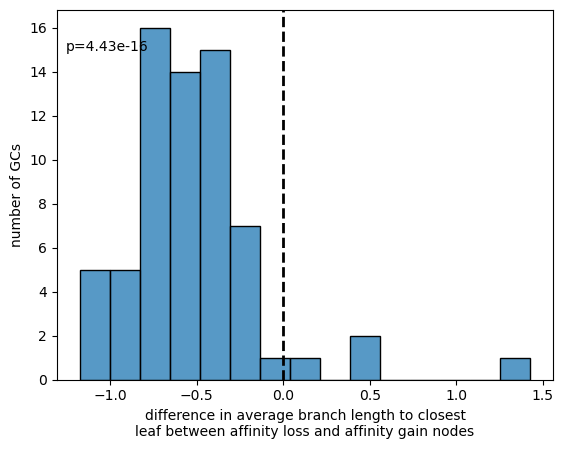

In [201]:
diff_stat = df_groups.query("`affinity change stratum` == 'affinity loss'").set_index("GC").closest_leaf_distance_nt - df_groups.query("`affinity change stratum` == 'affinity gain'").set_index("GC").closest_leaf_distance_nt

from scipy.stats import ttest_1samp

p = ttest_1samp(diff_stat, 0).pvalue

sns.histplot(diff_stat, bins=15)
plt.xlabel("difference in average branch length to closest\nleaf between affinity loss and affinity gain nodes")
plt.ylabel("number of GCs")
plt.axvline(0, c="k", ls="--", lw=2)
plt.annotate(f"p={p:.2e}", (0.1, 0.9), xycoords="axes fraction", va="center", ha="center")
plt.savefig(f"{output_dir}/terrible-significance.pdf")
plt.show()

### Do high REI events drive GC-wise affinity outcomes?

In [202]:
early_burst_GCs = set(df.loc[(df.REI > 0.05) & (df.root_distance_nt <= 2)].GC.unique())
early_burst_GCs

{'PR1_mouse1_GC1',
 'PR1_mouse1_GC14',
 'PR1_mouse1_GC16',
 'PR1_mouse1_GC20',
 'PR1_mouse1_GC7',
 'PR1_mouse2_GC26',
 'PR1_mouse2_GC29',
 'PR1_mouse2_GC40',
 'PR1_mouse3_GC42',
 'PR1_mouse3_GC43',
 'PR1_mouse3_GC65',
 'PR1_mouse4_GC47',
 'PR1_mouse4_GC48',
 'PR1_mouse4_GC73',
 'PR1_mouse5_GC79',
 'PR1_mouse5_GC83',
 'PR1_mouse6_GC75',
 'PR1_mouse6_GC77'}

In [203]:
df["early_burst_GC"] = df.GC.isin(early_burst_GCs)
df

,GC,name,parent_name,aa_mutations,aa_mutations_edge_gained,aa_mutations_edge_lost,abundance,n_mutant_edges,polytomy_degree,LBI,...,parent_delta_bind_CGG_naive,delta_bind_CGG_edge,delta_expr,delta_psr,mean_sister_delta_bind_CGG_naive,affinity stratum,affinity change stratum,divergence stratum,leaf distance stratum,early_burst_GC
0,PR1_mouse1_GC1,naive,NaN,,,,0,5,5,11.383587,...,NaN,NaN,0.00000,0.00000,NaN,affinity neutral,NaN,NaN,"(10.0, 21.0]",True
1,PR1_mouse1_GC1,seq62,naive,Y103(H)F;S20(L)N;L116(L)P,Y103(H)F;S20(L)N;L116(L)P,,1,0,1,1.172202,...,0.000000,0.082255,0.14827,-0.13364,-1.643222,affinity neutral,affinity neutral,"(2.0, 4.0]",NaN,True
2,PR1_mouse1_GC1,seq9,naive,E51(H)G;Y52(H)F;Y66(L)N;V71(L)I;D74(L)A;Q95(L)...,Q95(L)E;D74(L)A;V71(L)I;N108(L)K;S96(L)P;Y52(H...,,1,0,1,1.000157,...,0.000000,-1.414257,-1.05627,3.34321,-1.269095,affinity loss,affinity loss,"(8.0, 21.0]",NaN,True
3,PR1_mouse1_GC1,seq76,naive,Y58(H)D,Y58(H)D,,1,1,2,5.881581,...,0.000000,-0.663515,-0.15104,-0.15010,-1.456780,affinity neutral,affinity neutral,"(0.0, 1.0]","(0.0, 2.0]",True
4,PR1_mouse1_GC1,17,naive,N40(H)H;N108(L)D;Y114(L)S;E125(L)Q,N108(L)D;Y114(L)S;N40(H)H;E125(L)Q,,0,2,2,3.115025,...,0.000000,-4.941192,-0.77924,2.61806,-0.387361,affinity loss,affinity loss,"(2.0, 4.0]","(2.0, 5.0]",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5586,PR1_mouse6_GC77,seq45,1,K49(H)I;G54(H)V;S70(H)A;K72(H)R;S74(H)G;I78(H)...,Y88(H)S,,1,0,1,1.363245,...,0.229581,0.038130,-1.97716,4.12977,0.343619,affinity neutral,affinity neutral,"(8.0, 21.0]",NaN,True
5587,PR1_mouse6_GC77,seq19,10,S57(H)N;S64(H)R;T65(H)I;Y103(H)F;A105(H)G,Y103(H)F,,1,0,1,1.072084,...,1.486021,0.133944,-0.08653,0.23259,1.000586,affinity gain,affinity neutral,"(8.0, 21.0]",NaN,True
5588,PR1_mouse6_GC77,seq17,10,S57(H)N;S64(H)R;T65(H)I;A105(H)G;M11(L)L;G36(L...,K123(L)N;M11(L)L;Y66(L)S;G36(L)V,,2,0,2,2.273950,...,1.486021,-0.902463,-0.31626,-0.55349,1.518790,affinity gain,affinity neutral,"(8.0, 21.0]",NaN,True
5589,PR1_mouse6_GC77,seq9,10,S57(H)N;S64(H)R;T65(H)I;L89(H)V;A105(H)G,L89(H)V,,3,1,4,4.030638,...,1.486021,-0.068407,-0.12466,-0.23740,1.101761,affinity gain,affinity neutral,"(4.0, 8.0]","(0.0, 2.0]",True


`weights` argument is broken in latest seaborn violinplot, so changed this to a crude kdeplot that aggregates over GCs

/Users/wsdewitt/miniconda3/envs/replay/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


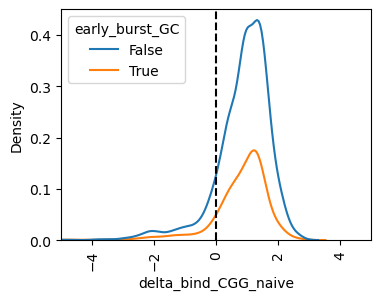

In [204]:
plt.figure(figsize=(4, 3))
sns.kdeplot(data=df.sort_values("early_burst_GC"),
            #    x="GC",
               x="delta_bind_CGG_naive",
               hue="early_burst_GC",
               weights="abundance",
            #    inner="quart",
            #    dodge=False,
               )
plt.axvline(0, ls="--", c="k")
plt.xlim(-5, 5)
plt.xticks(rotation=90)
plt.show()

Mutability change Vs affinity change over edges

In [205]:
# g = sns.JointGrid(data=df, x="mutability_change", y="delta_bind_CGG_edge", ylim=(-2, 2), height=10, ratio=3)
# g = g.plot_joint(sns.histplot, bins=(30, 120), vmax=60, cmap="viridis", fill=True)
# sns.histplot(x=df["mutability_change"], bins=30, color="grey", ax=g.ax_marg_x)
# sns.histplot(y=df["delta_bind_CGG_edge"], bins=120, color="grey", ax=g.ax_marg_y)
# plt.show()

In [206]:
# plt.figure(figsize=(4.5, 4.5))
# ax = sns.histplot(data=df, x="mutability_change", hue="affinity change stratum",
#              hue_order=palette.keys(),
#              bins=10,
#              stat="probability", common_norm=False,
#              palette=palette,
#              fill=False, element="poly", linewidth=2)

## Frequent mutations

In [207]:
from collections import Counter

mutation_events = Counter()
mutation_prevalence = Counter()
for idx, row in df.iterrows():
    if row.aa_mutations_edge_gained:
        mutation_events.update(row.aa_mutations_edge_gained.split(";"))
    if row.abundance and row.aa_mutations:
        mutation_prevalence.update({mutation: row.abundance for mutation in row.aa_mutations.split(";")})

In [208]:
df_mutations = pd.Series(mutation_events, name="mutation_events").to_frame().join(pd.Series(mutation_prevalence, name="mutation_prevalence"))
df_mutations.sort_values("mutation_events", ascending=False)[:20]

,mutation_events,mutation_prevalence
S57(H)N,239,681
S64(H)N,163,340
N108(L)K,140,1061
S109(L)N,137,269
Q105(L)H,122,679
E101(L)D,112,169
Y42(L)F,98,345
S109(L)R,97,425
A105(H)G,95,2536
S64(H)T,87,197


### Pairwise epistasis

### Is the bump still there if we remove putatively epistatic mutations or high incidence mutations?

In [209]:
epi_mutations = pd.read_csv("output/mutations/epistatic-pairs.csv")
epi_mutations = set(np.concatenate((epi_mutations["background mutation"].values, epi_mutations["mutation event"].values)))
epi_mutations

{'A105(H)G',
 'D74(L)N',
 'E101(L)D',
 'F115(H)L',
 'K123(L)N',
 'L50(H)F',
 'N108(L)H',
 'N108(L)K',
 'N108(L)S',
 'Q105(L)H',
 'Q95(L)K',
 'R67(L)K',
 'S109(L)N',
 'S109(L)R',
 'S109(L)T',
 'S57(H)N',
 'S64(H)R',
 'T37(L)S',
 'T96(H)P',
 'Y42(L)F'}

In [210]:
topn = 30
freq_mutations = df_mutations.sort_values("mutation_events", ascending=False)[:topn].index

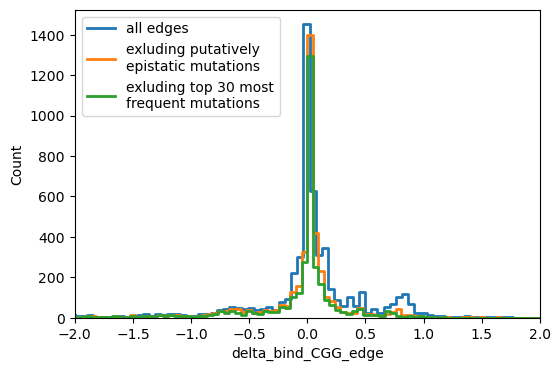

In [211]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df,
             x="delta_bind_CGG_edge",
             bins=150, color="C0",
             label="all edges",
             fill=False, element="step", linewidth=2)
sns.histplot(data=df.loc[df.aa_mutations_edge_gained.map(lambda mutations: not any(mutation in epi_mutations for mutation in mutations.split(";")))],
             x="delta_bind_CGG_edge",
             bins=150, color="C1", 
             label=f"exluding putatively\nepistatic mutations",
             fill=False, element="step", linewidth=2)
sns.histplot(data=df.loc[df.aa_mutations_edge_gained.map(lambda mutations: not any(mutation in freq_mutations for mutation in mutations.split(";")))],
             x="delta_bind_CGG_edge",
             bins=150, color="C2", 
             label=f"exluding top {topn} most\nfrequent mutations",
             fill=False, element="step", linewidth=2)
plt.xlim(-2, 2)
plt.legend(loc="upper left")
plt.savefig(f"{output_dir}/bump.pdf")
plt.show()

## Permissive selection below bursts? Stratified by root distance